<h1>Credit Risk Prediciton</h1>

# Tables of Content:

**1. [Understanding the problem](#Problem)** <br>
- 1.1 [The problem: Credit Risk Analysis](#Credit)
- 1.2 [Information about datasets](#Data)

**2. [Understand the data](#Understand)** <br>
- 2.1 [Import data](#Import)
- 2.2 [Understanding of data with DDA](#DDA)
- 2.3 [Data quality assessment with DDA](#Quality)

**3. [Data Analysis with EDA](#EDA)** <br>
- 3.1 [Univariate analysis](#Univariate)
- 3.2.[Bivariate analysis](#Bivariate)

**4. [Data Preprocessing](#Preprocessing)**<br>
- 4.1 [Prepare for target variable Risk](#Target)
- 4.2 [Prepare for predict variable](#Predict) 
- 4.3 [Deal with missing values](#Missing)
- 4.4 [Deal with extremely skewed variables](#Skewed)
- 4.5 [Transfer object and category into numerical](#Transfer)
- 4.6 [Full training dataset preparation](#Training)

**5. [Prediciton Model Construction and Evaluation](#Modelling)** <br>
- 5.1 [Load needed library](#Library)
- 5.2 [Prepare the datasets](#Prepare)
- 5.3 [Train and assess prediction models](#Train)

**6. [Prediction models fine tune](#Tune)** <br>
- 6.1 [Features selection](#Features)
- 6.2 [Models' perforance Cross-Validation](#CV)
- 6.3 [Overfitting detection with K-fold CV](#Overfitting)
- 6.4 [Fine tune RF Hyper Parameters with K-fold CV](#RFCV)

<a id="Problem"></a>

# **1. Understand the problem** 
<a id="Credit"></a>

## 1.1 What is the Purpose of Credit Risk Analysis? ##

The purpose of credit risk analysis is to assess the likelihood of a borrower defaulting on their financial obligations and to evaluate the potential risks associated with lending money to them. Credit risk analysis is important for lenders, as it allows them to make informed decisions about extending credit to individuals or businesses, while mitigating the risk of financial losses due to default or non-payment.

Credit risk analysis involves a comprehensive evaluation of a borrower's credit history, financial status, and ability to repay their debts. This analysis may include an assessment of the borrower's credit score, income, assets, liabilities, and other relevant factors that could impact their ability to repay a loan. The credit risk analysis process also considers economic factors, such as market conditions and macroeconomic indicators, that could impact a borrower's ability to repay a loan.

Credit risk analysis helps lenders make informed decisions about the terms of the loan, such as the interest rate, collateral requirements, and repayment period. Lenders may also use credit risk analysis to determine whether or not to approve a loan application and, if approved, the maximum amount of credit that can be extended.

Overall, credit risk analysis is important for lenders to manage their exposure to risk and to make informed lending decisions. By assessing credit risk, lenders can determine the appropriate terms for lending money and reduce the likelihood of financial losses due to default or non-payment.

### What is the result of Credit risk analysis? ## 
If the borrower presents an acceptable level of default risk, the analyst can recommend the approval of the credit application at the agreed terms. The outcome of the credit risk analysis determines the risk rating that the borrower will be assigned and their ability to access credit.

When calculating the credit risk of a particular borrower, lenders consider various factors commonly referred to as the **“5 Cs of Credit.”** The factors include the borrower’s **capacity** to repay credit, **character**, **capital**, **conditions**, and **collateral**. The lender uses the factors to evaluate the characteristics of the borrower and conditions of the loan to estimate the probability of default and the subsequent risk of financial loss.

### What tools can be used for Credit risk analysis? ##
Credit analysts may use various financial analysis techniques, such as ratio analysis and trend analysis to obtain measurable numbers that quantify the credit loss. The techniques measure the risk of credit loss due to changes in the creditworthiness of borrowers.

When measuring the credit loss, we consider both losses from counterparty default, as well as deteriorating credit risk rating.

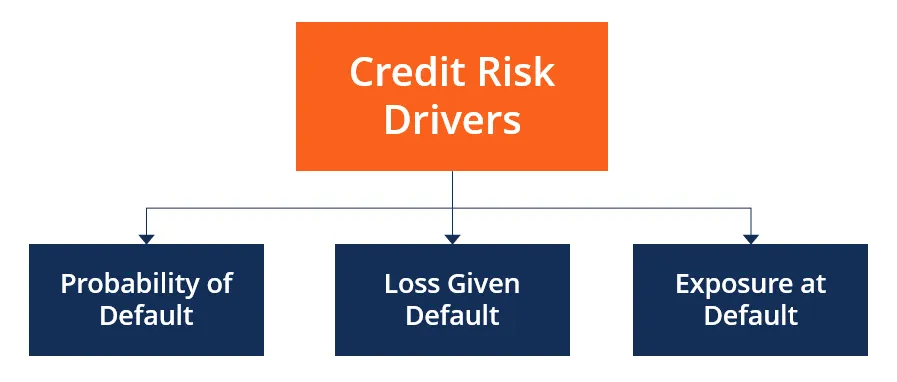

<a id="Dataset"></a>

## 1. 2 The data set ##
This tutorial we will use [**German Credir Dataset**](https://www.kaggle.com/datasets/uciml/german-credit) to illustrate the credit analysis process and tools. (the dataset is avaliable with this tutorial.

### German-Credit-Dataset ###

The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.

### Content ###
It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, I wrote a small Python script to convert it into a readable CSV file. Several columns are simply ignored, because in my opinion either they are not important or their descriptions are obscure. The selected attributes are:

<b>Age </b>(numeric)<br>
<b>Sex </b>(text: male, female)<br>
<b>Job </b>(numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
<b>Housing</b> (text: own, rent, or free)<br>
<b>Saving accounts</b> (text - little, moderate, quite rich, rich)<br>
<b>Checking account </b>(text - little, moderate, quite rich, rich)<br>
<b>Credit amount</b> (numeric, in DM)<br>
<b>Duration</b> (numeric, in month)<br>
<b>Purpose</b>(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others<br>
<b>Risk </b> (Value target - No or Yes)<br>

<a id="Understand"></a>

# **2. Understanding of Data** 

Data are a collection of facts, statistics, or information that can be processed or analyzed to derive insights or conclusions. Understanding data involves comprehending the data quantity and quality, meaning, significance, and patterns within the data.

The first step in a data analytical project is to **import data into a workspace** (Python DataFrame). Generally, the data can be from multiple sources with different formats. They can be imported into variety of data representations like Array, list, series or any other forms. For illustration purpose, we are importing our data form a single CSV file.

First of all, we need to import necessary libraries. In any data analysis project with Python, we need: Pandas, NumPy, Seaborn and Matplotlib at the least. 

In [9]:
#Load the necessary librarys

import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

In [10]:
#hide warnings

import warnings
warnings.filterwarnings('ignore')
cmap=sns.color_palette('Blues_r')

<a id="Import"></a>
## 2.1 Import raw data ###

Now let us import the source data. This is an important step in any data analysis project. It is normally called data aggregation. There are several methods support this step: 
•	Importing from flat files (txt, CSV, Excel, HDF5, SAS) using pandas
•	Import data from RDB
•	Import data from a Web API
•	Web Scraping 

Yulei’s blog (Sandbox) has many pythons basic usage for Data Science. It is worth to have a look. For example.

[Importing Data in Python](https://yuleii.github.io/2020/06/22/importing-data-in-python.html)


In [11]:
#Importing the data

df = pd.read_csv("german_credit_data.csv",index_col=0)

In [12]:
# check dataframe df_credit

df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


It confirms the 10 attributes introduced in the data file contents. We can see the **“Risk”** attribute has two value *“good”* and *“bad”*. Not “Yes” or “No”. We can also observe that attribute **“Saving account”** has value *“NaN”*, it generally means “not available”. 
Let us to Descriptive analysis. That normally including assess data **Quantity** (dataset size  or volume) and **Quality** (any missing values or obvious problem like NaN). 


<a id="DDA"></a>
## 2.2 Understanding of data with DDA ##

There are several methods that can be used to understand data, including:
- **Descriptive statistics or Descriptive data analysis (DDA)**: This involves summarizing the data using measures such as mean, median, mode, and standard deviation.
- **Exploratory data analysis (EDA)**: This involves visually analysing the data to identify patterns, outliers, and relationships between variables. This involves representing the data using charts, graphs, and other visual aids to help identify patterns and relationships.
- **Inferential statistics or predictive data analysis (PDA)**: This involves making predictions and drawing conclusions about a larger population based on a sample of the data.

This section, we will illustrate how to use DDA to help us understand the data we have imported. 

**Descriptive data analysis (DDA)** is a foundational tool for data analysis, and it is often used in conjunction with other advanced tools for data analysis such as predictive modeling and machine learning. Predictive modeling involves using statistical algorithms to analyze data and make predictions about future outcomes. Machine learning involves using algorithms to analyze data and automatically improve performance based on new data.

DDA is an important first step in the data analysis process because it provides a basic understanding of the data and identifies patterns and trends that can inform the development of more complex predictive models. Predictive modeling builds on the insights gained from DDA by identifying key variables that are most predictive of the outcome of interest, and then using those variables to develop a predictive model. This model can be used to make predictions about future outcomes based on new data.

### Generally describe data
Let us to Descriptive analysis. That normally including assess data Quantity (dataset size  or volume) and Quality (any missing values or obvious problem like NaN). 

In [13]:
# check data size and Missings values,type of data 

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


The results above tell us what? Can you see the size of the dataset? What is the data type “object” mean?

(Try to add self-annotation in places you may have issues. At the end you can have one of your own personal notebook.)

Here is an exmple note:
Findings: With this basic data Summary (only applies to Int attributes), we also can see that

   - The data size is: 1000 (samples) X 10 (attributes).
   - Among the 10 attributes, Risk is the target variable (it is also called dependent variable in the machine learning and predictive analysis. It is the variable that we need to predict for any given new records)
   - There are 4 variables with int64 type, and 6 with object (string) type.
   - We can see the range of each variables the most value is 921 from Credit amount, and the least is a binary from Sex, and Risk.
   - We can also see that Saving accounts and Checking account have missing values since their "non-null" is less than the number of samples (1000).
   - Job type is NOT correct. It should have a categorical type not Int. This is arguable at least. We will see the data transform - change types and values later. 


### Check attributes value uniqueness

Another thing is important to know about our dataset is check individual attributes **domain** (value range). We do this by run the **.unique()** function from Pandas. 

In [14]:
#Looking unique values
print(df.nunique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64


### Five-number summary

In [15]:
#look into the 5-number summary of individual attribute
print(df.describe())

               Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000


**Findings:** With this basic data summary (only applies to Int attributes), we can see that 
- The records count: 1000 (smaples) 
- The 4 integer attributes' mean and std
- The statistical 5-number summary: Min, 1st Qtr, 2nd Qtr and 3nd Qtr and Max

<a id="Quality"></a>
## 2.3 Data quality assessment with DDA
Data quality assessment is an important step a data analysis project. It involves evaluating the quality of the data to ensure that it is suitable for analysis. The goal of data quality assessment is to identify any data quality issues, such as missing or inconsistent values, outliers, errors, or duplicates.

Once data quality issues are identified, data preprocess is need to resolve these issues. therefore, data quality assessment is, in some way, setting target and goals for data preparation. This involves defining the data cleaning and transformation steps necessary to address the identified issues and improve the quality of the data. 

###  Finding missing values and the percentage 

                  Num   Pct
Age                 0   0.0
Sex                 0   0.0
Job                 0   0.0
Housing             0   0.0
Saving accounts   183  18.3
Checking account  394  39.4
Credit amount       0   0.0
Duration            0   0.0
Purpose             0   0.0
Risk                0   0.0


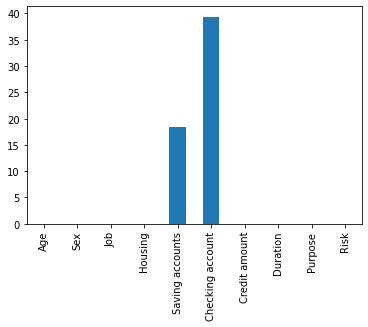

In [16]:
#Get the numbers of missing values in each column
missing = df.isnull().sum()

#Get the percentage of missing values in each column
missing_pct = round(df.isnull().sum()/len(df) * 100, 1)

data_missing = pd.concat([missing, missing_pct], axis=1)
data_missing.columns = ["Num", "Pct"]
print(data_missing)

#Plot missing values
data_missing['Pct'].plot(kind= "bar")
plt.show()

The result shows there are 183 missing values in **“Saving accounts”** and 194 missing values in **“Checking account”**. The percentage of missing values are **18.3 and 39.4** respectively. They are **Alarmingly high** and needs investigate and understand why. In data science there are many methods can be sued to deal with the missing values. We will deal with the missing values later.

<a id="EDA"> </a>
# 3. Data Analysis with EDA

**Exploratory Data Analysis (EDA)** is another important and useful data analysis method that can be used to understand the structure and characteristics of the data. One important aspect of EDA is the analysis of data attributes. Data attributes are the characteristics or features of a dataset, such as numerical values, categorical variables, or dates.

Data attribute analysis is the process of exploring and analyzing the various attributes of a dataset to gain insights into the data and inform subsequent analysis. This analysis includes examining the distributions, frequencies, and relationships between different data attributes, as well as identifying any outliers or missing values.

The goal of data attribute analysis is to understand the underlying patterns and relationships within the data, which can then inform the selection of appropriate statistical methods, models, and algorithms for further analysis. For example, data attribute analysis may reveal the presence of significant correlations between different attributes, which can be exploited to develop predictive models or identify important factors that affect a particular outcome.

<a id="Univariate"> </a>
## 3.1 Univariate analysis

Univariate analysis is a statistical analysis technique that involves examining the distribution and characteristics of a single variable in a dataset. It is a method used to understand the characteristics and behaviour of a single variable and is often used as a preliminary analysis to explore and summarize data.
In univariate analysis, a single variable (attribute) is examined in isolation, and various statistical measures such as mean, median, mode, range, variance, standard deviation, and percentiles are used to describe the distribution of the data. Visualization techniques such as histograms, box plots, and density plots are also commonly used to represent the distribution of the data and identify any outliers, gaps, or skewness.
Univariate analysis is commonly used to answer questions such as:

 - What is the range of values that the variable takes?
 - What is the most common value of the variable?
 - What is the average value of the variable?
 - What is the variability or spread of the data?
 
Univariate analysis is often used as a starting point for more complex analyses such as multivariate analysis, where the relationships between multiple variables are examined. By first understanding the distribution and characteristics of individual variables through univariate analysis, it becomes easier to identify potential relationships and patterns in the data that may be relevant for more advanced analysis.


### Attribute with <b>Object</b> type and their distribuition analyses ###

We know from .info() function call earlier that the whole dateset has 6 attributes with type **object**. and they are:

*'Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk'*

To illustrate a general EDA approach in python, we first define a function and then invoke the function to plot the graph. 

In [17]:
# Distribution graphs (histogram/bar graph) of object column 

def plotObjColumnDistribution(df, nGraphShown, nGraphPerRow):
    print(f'=== Distribution of features with object values ===')
    
    df = df[[col for col in df.select_dtypes(["object", "category"])]] # pick columns with object type
    
    nRow, nCol = df.shape
    columnNames = list(df)
    print(columnNames)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 5 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
 
    for i, col in enumerate(columnNames):
        # Plot distribution 
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        valueCounts = columnDf.value_counts()
        valueCounts.plot.bar()
        
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
        
    # Show the plot
    plt.tight_layout()
    plt.show()

=== Distribution of features with object values ===
['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']


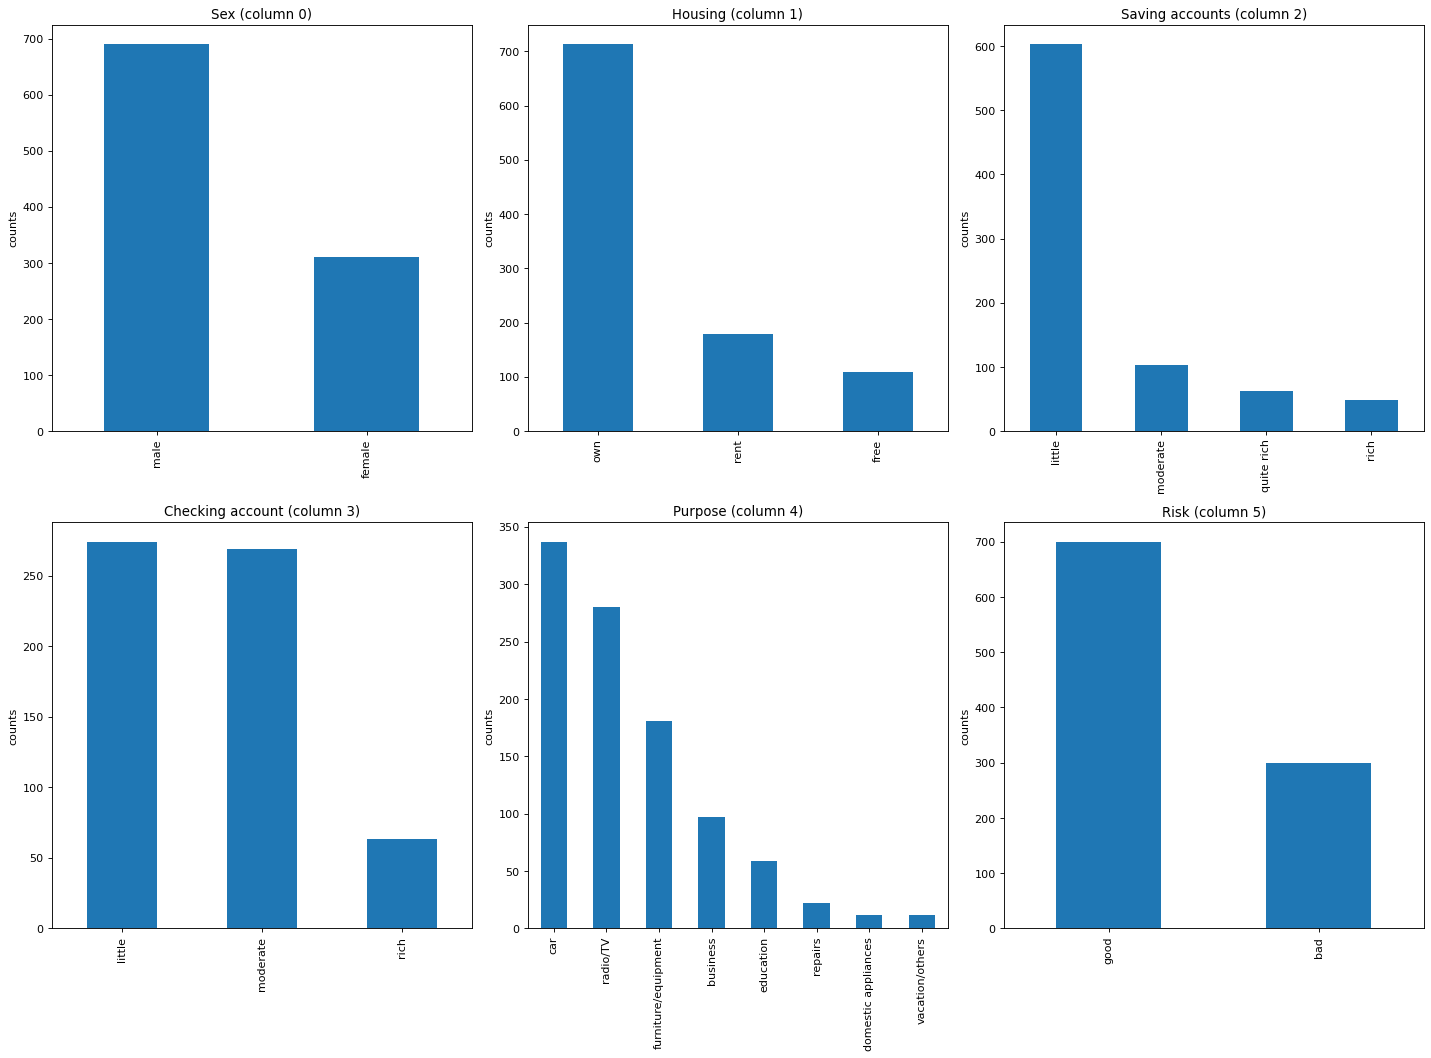

In [18]:
plotObjColumnDistribution(df, 10, 3)

**Findings**:

1.	Among the 6 categorical attributes. The value is distributed **Unevenly** most are **Skewed** to the left. It may affect the prediction later.
2.	The targeted dependent variable **Risk** is **imbalanced** the ratio is 700:300 between "good" and "bad"


### Attribute with <b>numerical</b> type and their distribution analyses ### 

We will do the same for **numerical** attibutes. There are 4 of them: *'Age', 'Job', 'Credit amount', 'Duration'* although we don't think job should be a numerical type. 

In [19]:
# Distribution graphs (histogram/bar graph) of column data with (num)
def plotNumColumnDistribution(df,nGraphPerRow):
    print(f'=== Distribution of features with number values ===')
    
    df = df[[col for col in df.select_dtypes(np.number)]] # pick columns with bumber type
    
    nRow, nCol = df.shape
    columnNames = list(df)
    print(columnNames)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 3 * nGraphRow))
 
    for i, col in enumerate(columnNames):
        # Plot distribution 
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        sns.distplot(df[col], color='blue')
        plt.title(f'Distribution of {col}')
    # Show the plot
    plt.tight_layout()
    plt.show()

=== Distribution of features with number values ===
['Age', 'Job', 'Credit amount', 'Duration']


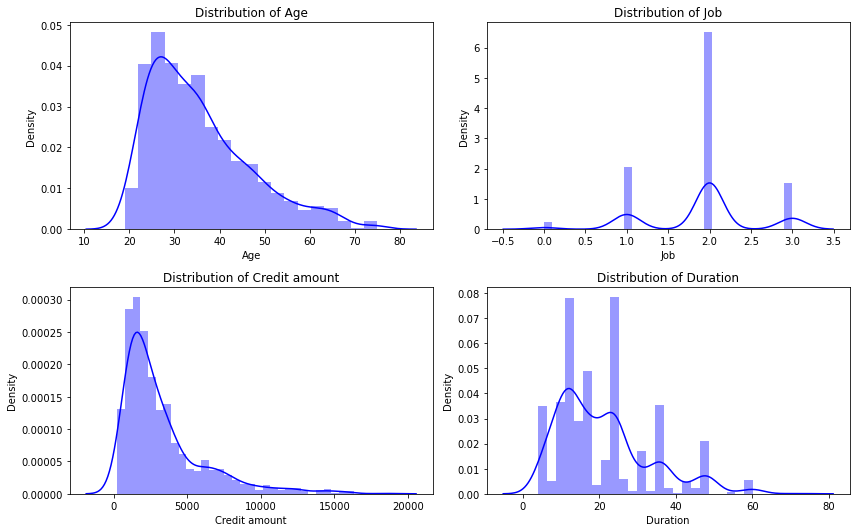

In [20]:
plotNumColumnDistribution(df, 2)

**Findings**: 

Among the 3 numerical attributes. The two values **Age** and **Credit amount** are distributed **Unevenly** and are **Skewed** to the left. It may affect the prediction later.


In [21]:
!pip install plotly

In [22]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [23]:
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features


<a id="Bivariate"> </a>
## 3.2. Bivariate analysis

In contrast to univariate analysis, **Bivariate analysis** is another statistical analysis technique that involves examining the relationship between two variables in a dataset.  Particularly, it is commonly used to analyze the interdependence and association between dependent varible and other variables.

Bivariate analysis is often used to answer questions such as:

- Is there a correlation or association between two variables?
- Does the relationship between two variables follow a particular pattern or trend?
- How do changes in one variable affect the other variable?

Bivariate analysis typically involves the use of various statistical methods, such as correlation analysis, regression analysis, and chi-square tests, to measure the strength and direction of the relationship between two variables. In addition, various visualization techniques such as scatter plots, heatmaps, and contour plots are commonly used to help identify patterns and trends in the data.

### Pairwise attributes plot with Seabone

Pairwise attribute plot is a type of data visualization technique that allows us to visualize the relationships between pairs of variables in a dataset. Seaborn, a popular data visualization library in Python, provides an easy way to create pairwise attribute plots using the pairplot() function. This plot can be useful for identifying patterns and correlations between different attributes in the dataset.

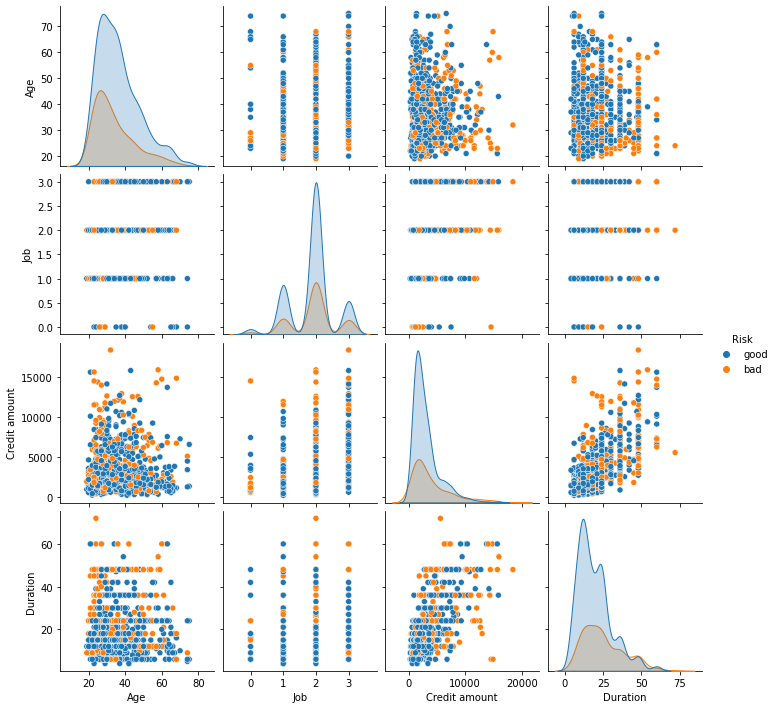

In [24]:
# Seaborn pairplot can produce a grid of Axes such that each numeric variable in data will by shared across the y-axes 
# across a single row and the x-axes across a single column.
sns.pairplot(df, hue="Risk")

Notice that it only shows the correlation between numerical attributes and the dependent variable **“Risk”**. 

It is hard to interpret the relationships in the graph. We can show more explicit relations between **“Risk”** and other numerical attributes. 

### Check numerical variables with Risk by histogram

In [25]:
# Distribution graphs (histogram/bar graph) of Numerical columns related with dependent variable risk
def plotRiskNumColumnDistribution(df, nGraphPerRow):
    
    df2 = df[[col for col in df.select_dtypes(np.number)]] # pick columns with number type
    
    nRow, nCol = df2.shape
    columnNames = list(df2)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    fig, axes = plt.subplots(int(nGraphRow), nGraphPerRow, figsize=(15, 8))
    axes = axes.ravel()

    for ax in axes:
        ax.set_axis_off()
    
    for i in range(len(columnNames)):
        #print (df[df["Risk"]=="No"][columnNames[i]].head())
        axes[i].hist(df[df["Risk"]=="good"][columnNames[i]], alpha=0.5, color='blue',  label='No')
        axes[i].hist(df[df["Risk"]=="bad"][columnNames[i]], alpha=0.5, color='red',  label='Yes')    
        
        axes[i].legend(prop={'size': 10})
        axes[i].set_title(str(columnNames[i]))
        axes[i].set_axis_on()
 
    fig.tight_layout()
    plt.show()

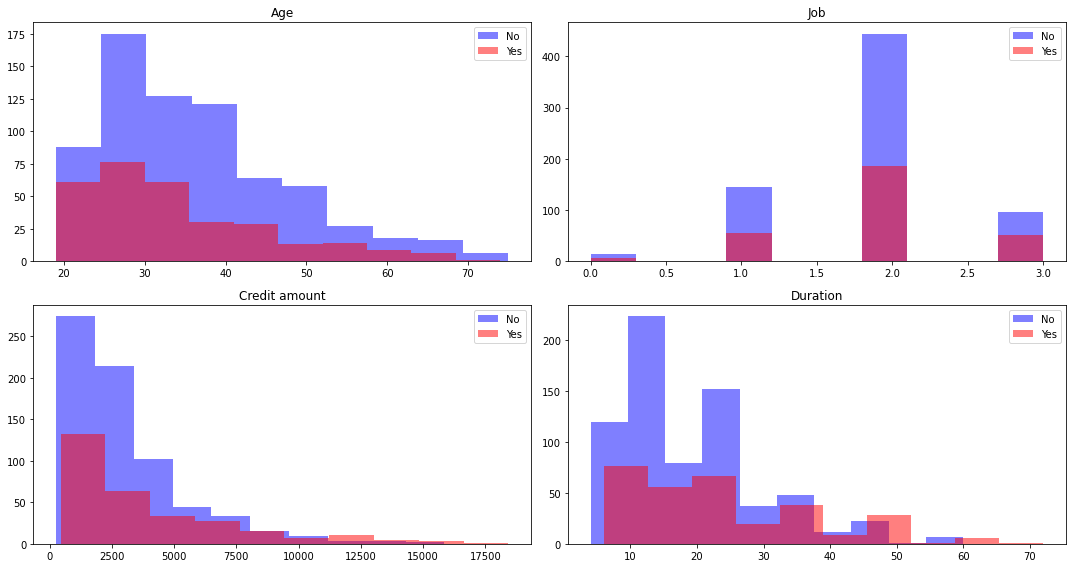

In [26]:
plotRiskNumColumnDistribution(df, 2)

**Findings**: 

Among the 3 numerical attributes. The two values **Age** and **Credit amount** are distributed **Unevenly** and are **Skewed** to the left. The Risk is proportionally with the distribution. It may affect the prediction later.


### Check categorical variables against Risk

In [27]:
# Distribution graphs (histogram/bar graph) of object column 
def plotRiskObjColumnDistribution(df, nGraphPerRow):
    print(f'=== Distribution of features with object values ===')
    df2 = df[[col for col in df.select_dtypes(["object", "category"])]] # pick columns with object type
    nRow, nCol = df2.shape
    #print(df2)

    columnNames = list(df2)
    #print(columnNames)

    columnNames = [item for item in columnNames if item != "Risk"]
    print(columnNames)
    
    nGraphRow = int((len(columnNames) + nGraphPerRow - 1)/nGraphPerRow)
    #print(nGraphRow)
    
    #the folloing code was suggested by ChartGPT. 
    #it creat a plot first then plot subplot into the plot so the size can be controled. 
    
    #creat a plot
    fig, axes = plt.subplots(nrows=nGraphRow, ncols=nGraphPerRow, figsize=(6*nGraphPerRow, 5*nGraphRow))
    
    #loop attributes to plot individual plots
    for i, col in enumerate(columnNames):
        ax = axes.flat[i]
        df_pct = df2.groupby([columnNames[i],'Risk'])['Risk'].count()/df2.groupby([columnNames[i]])['Risk'].count()
        df_pct.unstack().plot.bar(stacked=True, width=0.8, ax=ax)
        ax.set_ylabel('counts percent %')
        ax.set_title(f'Risk distribution with {columnNames[i]}')
    plt.tight_layout()
    plt.show()

=== Distribution of features with object values ===
['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']


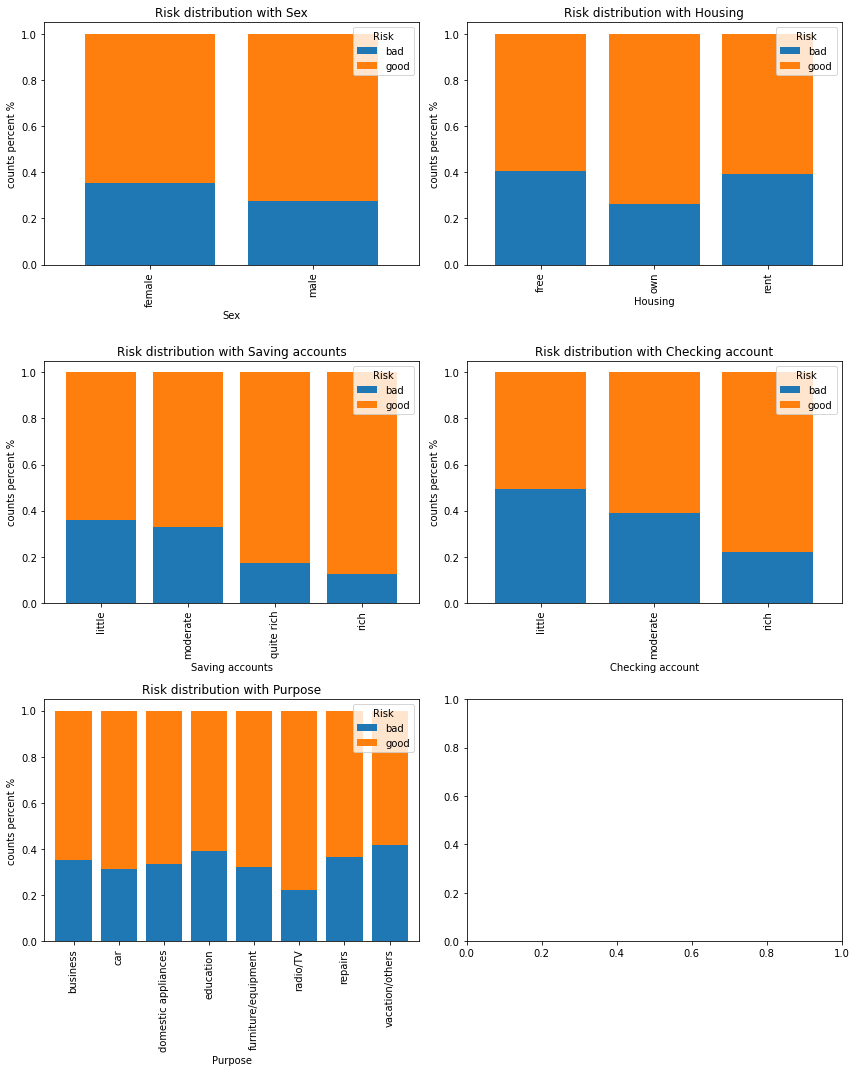

In [28]:
plotRiskObjColumnDistribution(df, 2)

<a id="Preprocessing"></a> 
# 4. Data Preprocessing
Following the step of "understanding data", we have a full understand of the raw data (data we have imported form the data source). We have identiofied the data quantity and quality issues. those issues set goals for **"data preprocessing"** to resolve.

**Data preprocessing** is an essential step in any data analytical project. It involves **transforming raw data into a format that is suitable for analysis**, which can involve a range of tasks such as cleaning, normalization, feature selection, and dimensionality reduction. Data preprocessing is critical because it can have a significant impact on the accuracy and reliability of the results obtained from the analysis. By ensuring that the data is properly prepared, data scientists can help to eliminate inconsistencies, reduce errors, and optimize the performance of their analytical models. As such, data preprocessing is a fundamental step in any data analytical project and should be given careful consideration to ensure that the analysis is based on high-quality data.

Data processing will generally produce a new dataset based on the raw dataset. We call a new dataset "df_credit". it should be more suitable for our prediction model construction later.

Data preprocessing can involves more complicated and tedious tasks. For illustration purpose, we only do the following:

1. We need to convert the target variable `Risk` into a numerical.
2. We need to split `df_credit` into predict variable and dependent variable.
3. We do some individual variable **transformation**, **fill missing data**


<a id="Target"></a>
## 4.1 Prepare for target variable **Risk**

In a data prediction model, it is generally necessary to convert the target variable into a numerical variable rather than a categorical variable. This is because most machine learning algorithms require numerical data to work properly, and cannot handle categorical data directly.

In [29]:
#Importing the data
df = pd.read_csv("german_credit_data.csv", index_col=0)
# It is a good idea and common practice you do data manipulation on a new dataframe and keep the original untouched
df_credit = df

In [30]:
#Change Risk column (target variable) into numerical with 0 and 1 values
df_y = df[['Risk']]
df_y['Risk'] = np.where(df_y.loc[ : , 'Risk']=='good', 0, 1)

df_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Risk    1000 non-null   int32
dtypes: int32(1)
memory usage: 11.7 KB


In [31]:
df_y.head()

,Risk
0,0
1,1
2,0
3,0
4,1


<a id="Predict"></a>
## 4.2 Prepare for predict variable 

It is also a common practice to drop target variable from the dataset and make it only contains the predict variables, so we can focuse on the analyses and manipulation of the predict variable. In our example, we will drop the “Risk” from df_credit. 

In [32]:
#Drop Risk

df_credit = df_credit.drop(["Risk"], axis=1)
df_credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


<a id="Missing"></a>
## 4.3 Deal with missing values

Missing values are a common issue that can occur in many datasets (for example, in our dataset we have  183 missing values in **Saving accounts** and  394 missing values in **Checking account**), and they can have a significant impact on the accuracy and reliability of data analytical models. 

There are several methods that can be used to handle missing values, depending on the nature and context of the missing data. One common approach is to impute missing values with estimated or predicted values. This can be done using methods such as mean or median imputation, regression imputation, or machine learning imputation. Another approach is to remove observations with missing values, either entirely or partially, depending on the amount of missing data and the context of the analysis. Alternatively, if the missing values are believed to be related to other variables, methods such as expectation-maximization (EM) or multiple imputation can be used to impute missing data in a more sophisticated manner. 

The choice of method will depend on the specific data analytical project and the nature of the missing values, as each approach has its own advantages and limitations. However, it is crucial to handle missing values appropriately to ensure that the analysis is based on high-quality and reliable data.

count        817
unique         4
top       little
freq         603
Name: Saving accounts, dtype: object


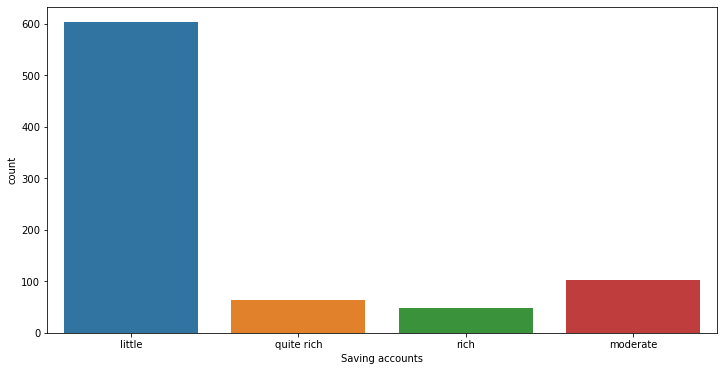

In [33]:
# Saving accounts has 183 missing values and Checking account 394 misisng values 
# check Saving accounts
print(df_credit['Saving accounts'].describe())

#plot the distribution of the existing values
plt.figure(figsize=(12,6))
sns.countplot(x='Saving accounts',data = df_credit)

plt.show()

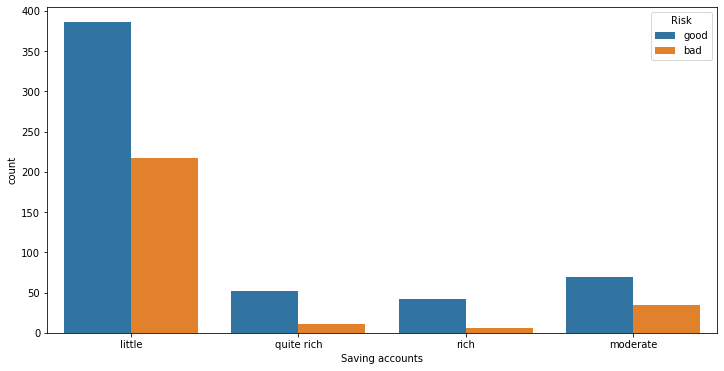

In [34]:
#plot a bar chart for the count of the Risk variable for each value of the Saving accounts variable

plt.figure(figsize=(12, 6))
sns.countplot(x='Saving accounts', hue='Risk', data=df)
plt.show()

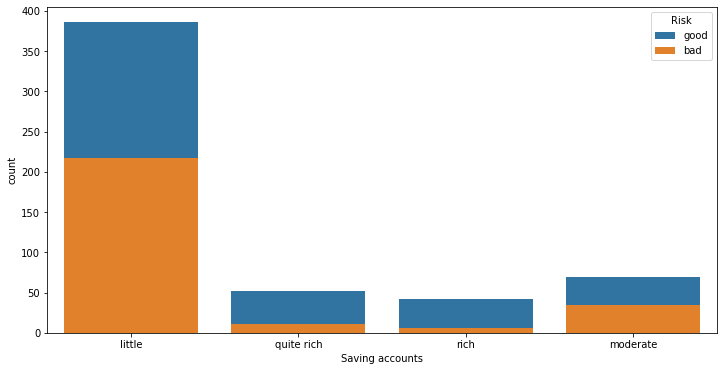

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace missing values with "Missing" category
df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('Missing')

# Plot a stacked bar chart for the count of the "Risk" variable for each value of the "Saving accounts" variable
plt.figure(figsize=(12,6))
sns.countplot(x='Saving accounts', hue='Risk', data=df, dodge=False)
plt.show()

#### From above descritipn and plot, we can see that the value of the **saving account** distribution and **Risk** distribution over the saving account:

1.	Majority is little, (603/817), the easiest solution is assigning all the missing value as *little*. 

    **Discuss its advantage and issues.** Once issue is that simple assign all the missign value as the most frequent value (in this caseis little) will introduce bias to the dataset. This is becasue the distribution of risk over saving acocunt value "little" is different with the risk distribution over missing vlaue. See the last figure.  

2.	The best solution would be to use an **imputation method** that takes into account the relationship between the "Saving accounts" and "Risk" variables to fill the missing values. That is to keep risk distribution over saving account unchanged after the value are assigned to the missing values. 

    Consider how to write pYthon code for this? Here are an example,
    
```python
import numpy as np

# get the unique values of the "Saving accounts" variable
unique_values = df_credit['Saving accounts'].unique()

# loop over the risk levels and impute the missing values for each level
for risk_level in df_credit['Risk'].unique():
    # get the indices of the missing values for the current risk level
    missing_indices = df_credit.loc[(df_credit['Risk'] == risk_level) & (df_credit['Saving accounts'].isna()), :].index
    # get the frequency of each unique value of "Saving accounts" within the current risk level
    freqs = df_credit.loc[df_credit['Risk'] == risk_level, 'Saving accounts'].value_counts(normalize=True)
    # loop over the missing indices and randomly assign one of the unique values based on their frequency
    for index in missing_indices:
        imputed_value = np.random.choice(unique_values, p=freqs.values)
        df_credit.loc[index, 'Saving accounts'] = imputed_value

```


In [36]:
# Assign missing vlaue with little

df_credit['Saving accounts'].fillna('little', inplace = True)
df_credit['Saving accounts'].describe()


count       1000
unique         5
top       little
freq         603
Name: Saving accounts, dtype: object

count        606
unique         3
top       little
freq         274
Name: Checking account, dtype: object


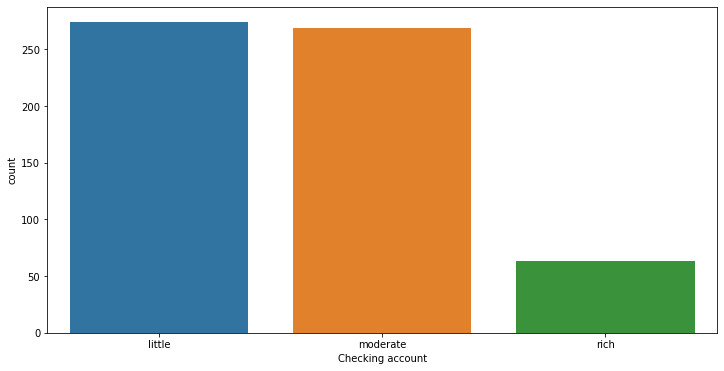

In [37]:
# Saving accounts has 183 missing values and Checking account 194 misisng values 
# checking accounts
print(df_credit['Checking account'].describe())

plt.figure(figsize=(12,6))
sns.countplot(x='Checking account',data=df_credit)

plt.show()

**Findings**: 
1. We can see that the current distribution is pretty even between **little** and **moderate**; and only small amount has value of **rich**
2. The targeted dependent variable **Risk** for the three category distribution are vary a lot. 

**Suggestion:** among the many fill missing value methods, one of them may suitable for this situation. **That is create a new category value** like *NoInfo* itself is valuable since the number of missing values is almost the same quantity with any other two most occurrences. 274 for little and 194 missing values.

<AxesSubplot:xlabel='Checking account', ylabel='count'>

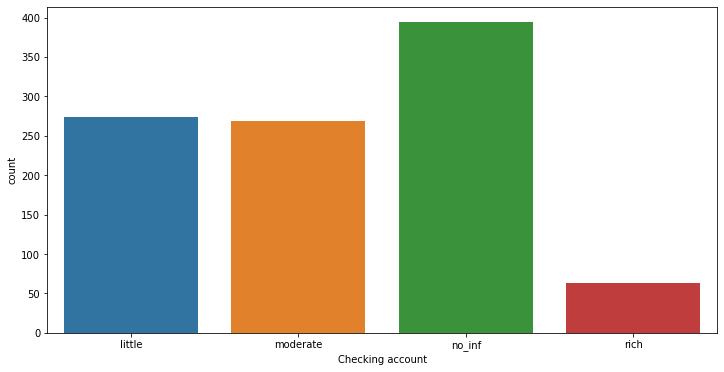

In [38]:
# fill the missing value with a category called "No_info"
df_credit['Checking account'].fillna('no_inf', inplace=True)
df_credit['Checking account'].head()
#df_credit['Checking account'].describe()
plt.figure(figsize=(12,6))
sns.countplot(x='Checking account',data=df_credit)

<a id="Skewed"></a>
## 4.4 Deal with extremely skewed variables

**Data transformation** is an essential step in data preprocessing, where the goal is to convert raw data into a more usable and informative format for subsequent analysis. This can involve converting data into a standard format, such as changing categorical data into numerical data or converting text data into structured data, to make it easier to analyse. Additionally, data transformation can involve rescaling or normalizing data to make it more comparable or reducing the number of features through feature selection or dimensionality reduction techniques. Some examples of data transformation techniques include normalization, standardization, logarithmic transformations, and one-hot encoding. The choice of data transformation techniques largely depends on the type of data, the analysis goals, and the statistical and machine learning models used for analysis. By transforming data, it becomes easier to identify patterns, reduce noise, and improve the accuracy of predictions or models. 
The numerical varaibles are all skewed to the left. They will affact most of ML models.

In this example, We need to normalise the numerical variabel values by performming a **log transformation** before using these features in our modelling.

=== Distribution of features with number values ===
['Age', 'Job', 'Credit amount', 'Duration']


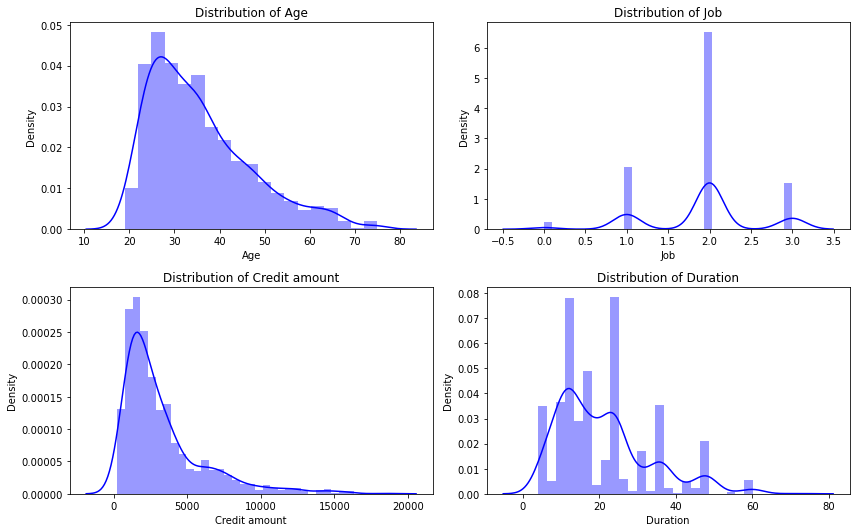

In [39]:
#performming a log transformation on numerical varibles

plotNumColumnDistribution(df, 2)

In [40]:
# Log transform function
def log_transform(data, to_log):
    X = data.copy()
    for item in to_log:
        # Add 1 to the data to prevent infinity values
        X[item] = np.log(1+X[item])
    return X

In [41]:
# log transfer
df_credit = log_transform(df_credit, ['Age', 'Credit amount', 'Duration'])

=== Distribution of features with number values ===
['Age', 'Job', 'Credit amount', 'Duration']


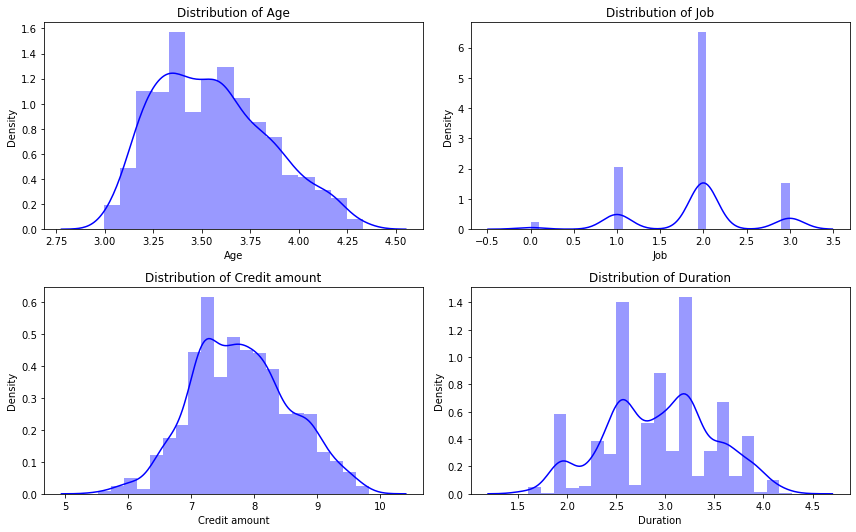

In [42]:
# check the result
plotNumColumnDistribution(df_credit, 2)

<a id="Transfer"></a>
## 4.5 Transfer object and category into numerical

In many real-world datasets, categorical data is commonly used to describe non-numeric data such as gender, colour, or country. However, many statistical and machine learning models require numerical data for analysis. Therefore, a necessary step in data preprocessing is to transform categorical data into numerical data. One common method for converting categorical data to numerical data is one-hot encoding. This involves creating a binary variable for each unique category in the original categorical variable, where the value of 1 indicates the presence of the category, and 0 indicates the absence. Another method is label encoding, where each unique category is mapped to a unique integer value. This can be useful for ordinal categorical data, where there is a natural ordering between the categories. A disadvantage of label encoding is that the integer values may imply a natural ordering that may not be present in the data, which may lead to erroneous modelling. Therefore, one-hot encoding is typically preferred. Overall, data type transformation is an essential step in data preprocessing to make the data suitable for subsequent analysis and modelling.

We need to do this for 2 reasons:
1.	most of the prediction models need predictor to be numerical.
2.	for correlation analysis we need attributes to be numerical too.

In [43]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns = categorical_columns, dummy_na = nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df

In [44]:
# do transformation on df-credit
df_credit_T = one_hot_encoder(df_credit)
print(df_credit_T.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1000 non-null   float64
 1   Job                          1000 non-null   int64  
 2   Credit amount                1000 non-null   float64
 3   Duration                     1000 non-null   float64
 4   Sex_female                   1000 non-null   uint8  
 5   Sex_male                     1000 non-null   uint8  
 6   Housing_free                 1000 non-null   uint8  
 7   Housing_own                  1000 non-null   uint8  
 8   Housing_rent                 1000 non-null   uint8  
 9   Saving accounts_Missing      1000 non-null   uint8  
 10  Saving accounts_little       1000 non-null   uint8  
 11  Saving accounts_moderate     1000 non-null   uint8  
 12  Saving accounts_quite rich   1000 non-null   uint8  
 13  Saving accounts_ric

After all the df_credit change into **numerical**, we can see the relation between them with the target variable **Risk**. We need to connect them together to form a training dataset.

<a id="Training"></a>
## 4.6 Full training dataset preparation

Any prediction model needs to be trained with a **training dataset** that has several essential characteristics to ensure the model can learn and make accurate predictions. One critical aspect of a training dataset is its structure and size, which should be sufficient to capture the full range of variability and patterns that the prediction model is expected to encounter in real-world data. Additionally, the dataset should be representative of the population or data the model will be operating on, meaning it should include a diverse range of data points that cover the full spectrum of potential inputs and outcomes. The quality of the training dataset is also essential since low-quality data can lead to biased or inaccurate predictions. A balanced training dataset is crucial to prevent the model from being biased toward the majority class, and it should have labelled examples that correspond to the outputs the model is attempting to predict. Overall, the quality and characteristics of the training dataset play a critical role in determining the accuracy and reliability of a prediction model.

In [45]:
#concat the df_credit with df_y 

data_train = pd.concat([df_credit_T, df_y], axis=1)
data_train.head()


,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_Missing,...,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk
0,4.219508,2,7.064759,1.945910,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,3.135494,2,8.691483,3.891820,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,3.912023,1,7.648263,2.564949,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,3.828641,2,8.972464,3.761200,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,3.988984,2,8.491055,3.218876,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


=== Distribution of features with number values ===
['Age', 'Job', 'Credit amount', 'Duration', 'Sex_female', 'Sex_male', 'Housing_free', 'Housing_own', 'Housing_rent', 'Saving accounts_Missing', 'Saving accounts_little', 'Saving accounts_moderate', 'Saving accounts_quite rich', 'Saving accounts_rich', 'Checking account_little', 'Checking account_moderate', 'Checking account_no_inf', 'Checking account_rich', 'Purpose_business', 'Purpose_car', 'Purpose_domestic appliances', 'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs', 'Purpose_vacation/others', 'Risk']


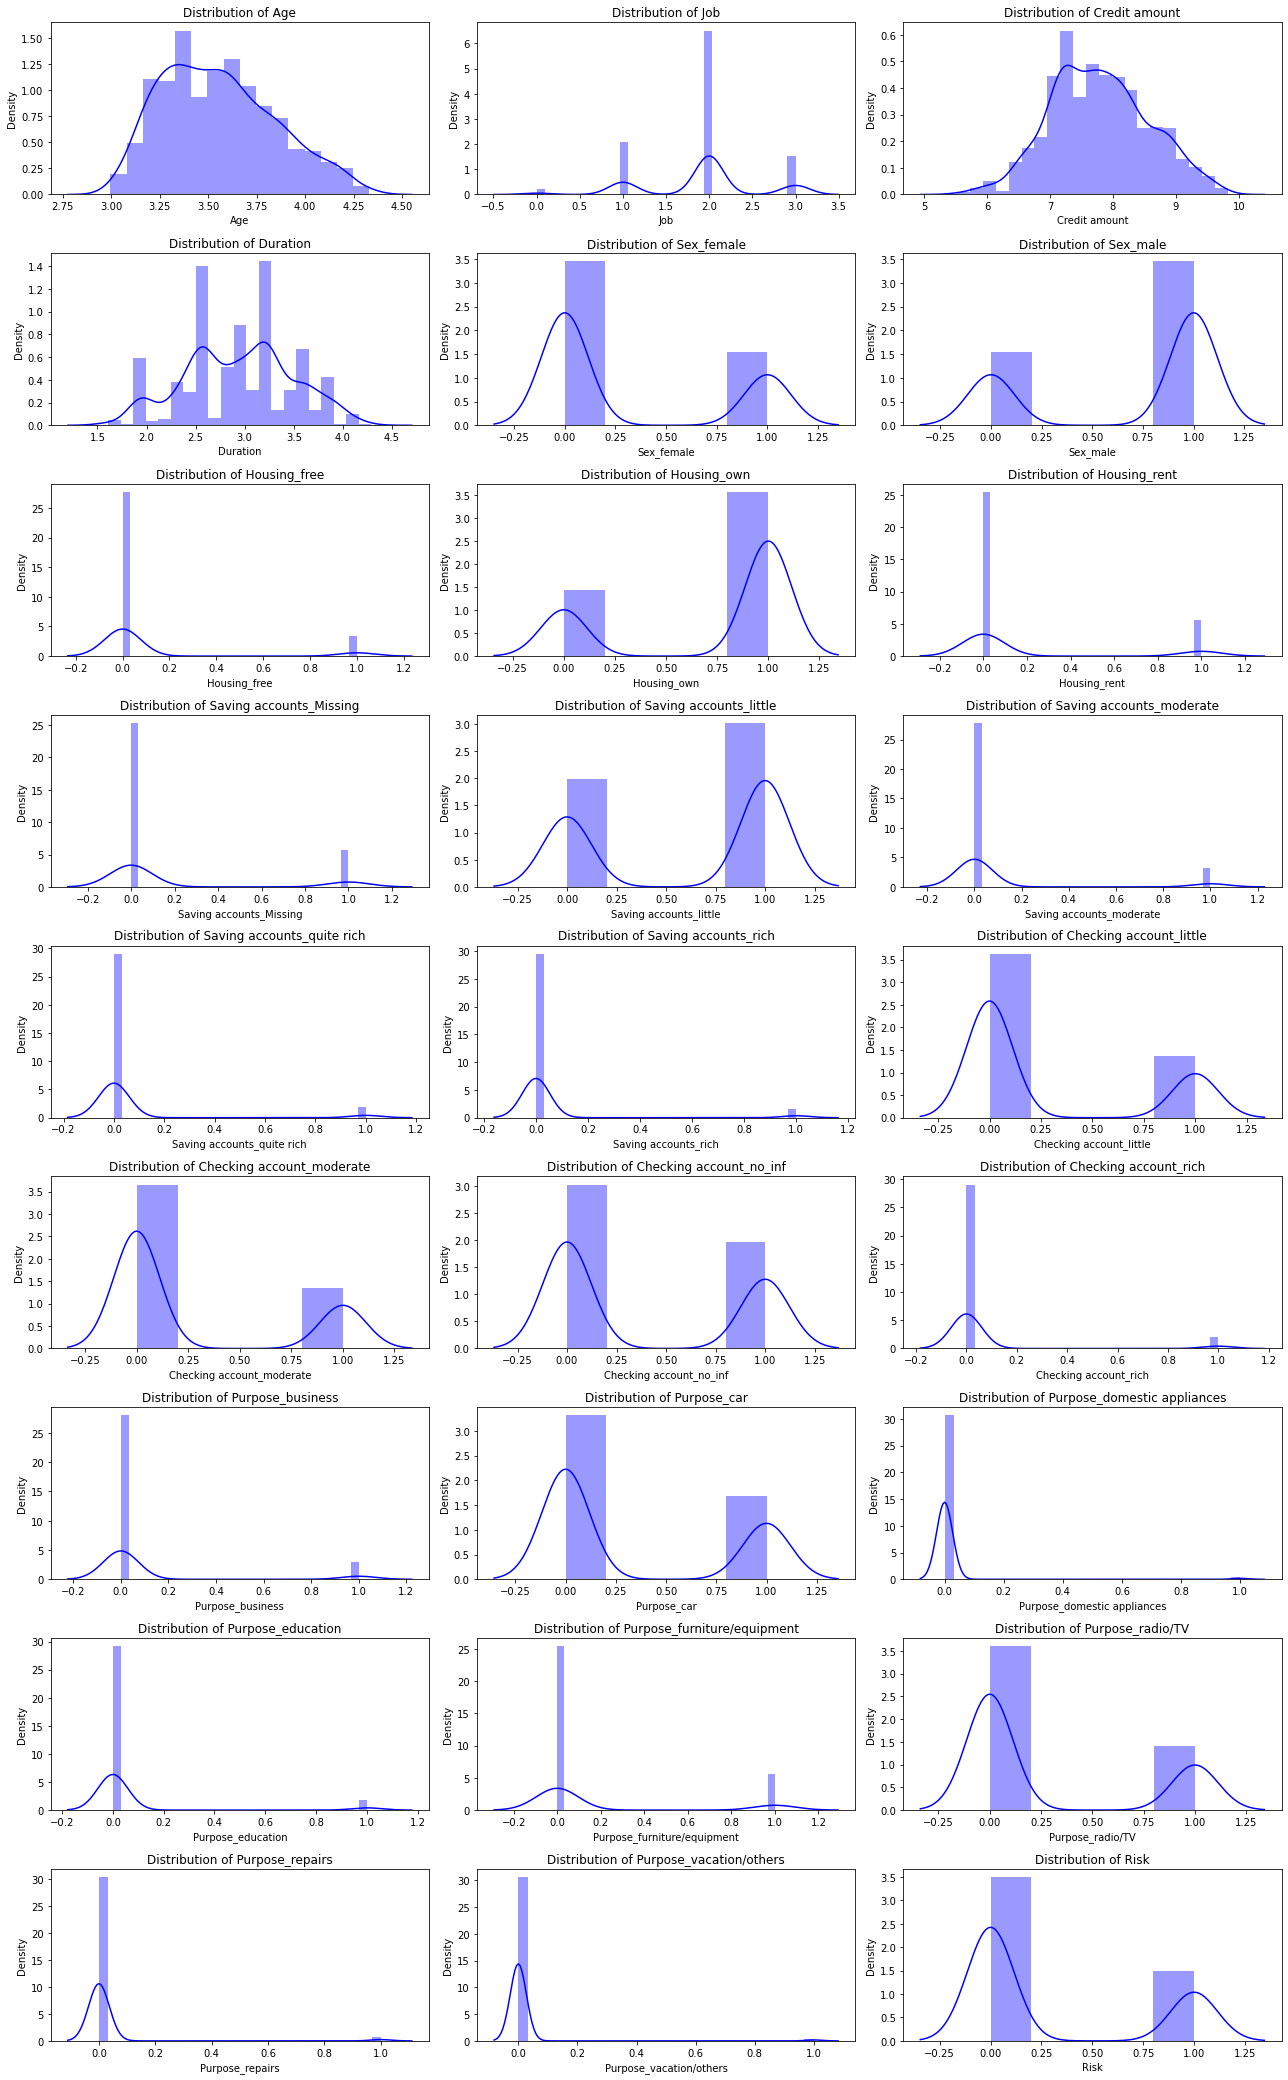

In [46]:
# check distributions
plotNumColumnDistribution(data_train, 3)

After this basic data preprocessing, we have produced a new dataset ready for to be used for our model construction.
1. **df_credit_T**: Dataset only contains independent variables after normalisation.
2. **df_y**: dataset only has the dependent variable "Risk" and only has 0 and 1.
3. **data_train**: concatenation of the two.

We are ready to build our prediction models. We also need to assess our model’s performance. That is the next action.


<a id="Modelling"></a> 
# 5. Prediciton Model Construction and Evaluation

In a predictive data analysis project, the construction of a model is a crucial step that enables the prediction of future outcomes based on historical data. A well-constructed model takes into account various factors, such as the quality and quantity of data, the choice of algorithm, and the proper evaluation of the model's performance. The construction of a model requires a combination of technical skills and domain knowledge, as well as an understanding of the problem at hand and the business context in which it operates. A successful model can provide insights into the factors that influence the outcome of a given process, identify potential risks, and guide decision-making. In this context, the construction of a model is a critical element in predictive data analysis projects, which aim to leverage data to inform and improve business operations.

Python offers a rich library of machine learning tools, including the widely-used **Scikit-learn (SKlearn)**. In Scikit-learn (SKlearn), model training involves selecting an appropriate algorithm and optimizing its parameters to fit a given dataset. This process involves splitting the data into training and testing sets and using the training set to train the model while assessing its performance on the testing set. The choice of algorithm and parameters can significantly impact the model's accuracy, which is typically measured using various metrics such as accuracy, precision, recall, and F1-score.

Sklearn's implementation of machine learning models as Python classes allows for a straightforward implementation process. Using pre-processed data, we can instantiate these classes and make an initial assessment of the models' performance. 

However, developing a good prediction model typically involves an iterative process, which may require revisiting data processing, such as feature selection or data transformation, to improve data quality for the models. 

In order to gain an initial impression of the possible prediction models, we will utilize several popular models offered by Sklearn, including:

- the Random Forest Classifier, 
- Logistic Regression models, 
- Decision Tree Classifier, 
- K-Nearest Neighbors Classifier, 
- Gaussian Naive Bayes, 
- SVC, and 
- XGBoost

We will intially use all default parameters without specification.

<a id="Library"></a>
## 5.1 Load needed library

In [47]:
!pip install xgboost --user

In [48]:
# liberary loading
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

<a id="Prepare"></a>
## 5.2 Prepare the datasets
Any prediction models from Sklean needs the 4 datasets for training and testing to assess its performance. They are:

- X_training: dataset only has all the predict variables’ value for training. 
- y_training: dataset only has values of target variable (Risk) for training.
- X_test: dataset only has all the predict variables’ value for testing. 
- y_test: dataset only has values of target variable (Risk) for testing.

Those are generated by a split factor traing: testing. Most commonly used proportion is 80:20, 75:25; and 70:30. 


In [49]:
# prepare for training and testing datasets for Sklearn models using 75:25 proportion

X = df_credit_T
y = df_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<a id="Train"></a>
## 5.3 Train and assess prediction models

In machine learning, model training and assessment are essential steps in building predictive models that can make accurate predictions on new, unseen data. 

In Scikit-learn (SKlearn), model training involves selecting an appropriate algorithm and optimizing its parameters to fit a given dataset. This process involves splitting the data into training and testing sets and using the training set to train the model while assessing its performance on the testing set. The choice of algorithm and parameters can significantly impact the model's accuracy, which is typically measured using various metrics such as accuracy, precision, recall, and F1-score.


Model LR has accuracy: 0.736
Model KNN has accuracy: 0.736
Model DT has accuracy: 0.652
Model NB has accuracy: 0.660
Model RF has accuracy: 0.736
Model SVM has accuracy: 0.748
[11:45:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model XGB has accuracy: 0.752


<Figure size 1440x1296 with 0 Axes>

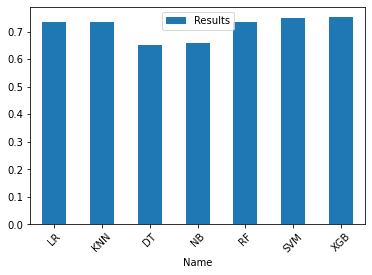

In [50]:
# to feed the random state
seed = 42

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
        model.fit(X_train, y_train)
        pre_results = model.predict(X_test)
        model_acc = accuracy_score(y_test, pre_results)
        names.append(name)
        results.append(model_acc)
        msg = "Model %s has accuracy: %0.3f" % (name, model_acc)
        print(msg)      

#print(names)
#print(results) 
# boxplot algorithm comparison
results_df = pd.DataFrame({'Name':names, 'Results':results})
#print(results_df)
fig = plt.figure(figsize=(20,18))
fig.suptitle('Algorithm Comparison')

results_df.plot.bar(x='Name',rot=45)

plt.show()

We can see how easy the model can be constructed and how the results can be predicted.
However, we don't know the results are best or not. This can be conformed or improved after the models fine tune.

**Findings:**

    - all models have pretty low accuracy
    - some models perform a liitle better than others

<a id="Tune"></a>
# 6. Prediction models fine tune

Fine-tuning a prediction model is crucial to achieving optimal performance, particularly when training the model using our own data. Without a pre-trained model, we must start from scratch and find the optimal set of model parameters and hyperparameters to fit our unique data. In addition, fine-tuning requires experimentation with various feature combinations, data pre-processing techniques, and other factors that can significantly impact model performance. Each of these factors is specific to the data we are using, making fine-tuning an iterative process that requires careful consideration and experimentation. To fine-tune the model, we may use general methods such as grid search, random search, or Bayesian optimization to explore the parameter space and identify the best performing model. However, it is important to keep in mind that fine-tuning is a time-consuming process that requires patience and expertise, as even small adjustments can have a significant impact on model performance. In the end, taking the time to fine-tune the model leads to better performance, more accurate predictions.

There are two major tasks involved in fine-tuning a prediction model:


**1. Increase the samples' quality;**

The samples used in the model training has bid affact on the model's performance. To use proper numbers of property and the appropriate property can increase the model's accuracy and increase the training cost. the most 2 popular methods used for property selection are:
**Coorelation analysis** and the **K-fold cross validation**.

**2. Adjust models' parameters;**

Each predictin model is defined or represented by the model parameters. However, the process of training a model involves choosing the optimal **hyperparameters** that the learning algorithm will use to learn the optimal parameters that correctly map the input features (independent variables) to the labels or targets (dependent variable). Hyperparameters are different depends on the prediciton models. There are different methods can be used to fine tune thses hyperparameters also depends on the model used.



1. K-fold cross validation
There are many methods to increse sample numbers. Such as Upsampling, it can overcome imbalance class. However, up-sampling can cause overfitting. Thus, k-fold cross validation will be used because this method is more superior than the simple train/test split to prevent overfitting. In addition, K=5 is chosen because empirical data showed that this value produces lower error rate and has a balanced bias vs variance (An Introduction to Statistical Learning, 2017).
2. Stratification
Due to class imbalance, for k-fold cross validation, we might end up with folds which has no representation from the minority class (Jason Brownlee, 2020). Hence, stratification will be applied to ensure that the original class distribution is maintained in each fold.
3. SMOTE method
If upsampling is done before cross validation, we risk data leak traps since the same upsampled data might appear in both the training and validation folds. Hence, SMOTE method will be used to segregate the data into its respective folds before up-sampling is done in each fold. SMOTE is selected because of its low chances of overfitting and information loss. (Nitesh, 2002)
4. Log transformation and Data scaling
Features in our dataset are skewed and have high variance. Such high variance will negatively impact the accuracy of the model. Thus, log transformation is done to reduce features’ variance. For features with minimum value of zero, 1 is added before taking log to prevent infinity values. Thereafter, Z-score normalization is done so that features are compared on a similar scale.
5. Hyper-parameter tunning
Hyper-parameters must be tuned to overcome bias-variance trade off in the models.
For example, in Random Forest, when the number of trees is low at the extreme left, underfitting results in high bias, thus high errors. As number of trees is increased towards the right side of the graph, overfitting sets in, resulting in low training error but increasing validation error. Thus, hyper-parameters must be fine-tuned to select the best param which prevent overfitting and underfitting. The hyper-parameters will be fine-tunned using GridSearchCV.

<a id="Features"></a>
## 6.1 Features selection and engineering

For any prediction models, features selection is important. It affacts the model's performance by 1. the number of the properties used (not the more the better). 2. whoch property to use (not use the ones are correlated). The two general methods used are:
- Correlation analysis
- PCA analysis

### Correlation Analysis

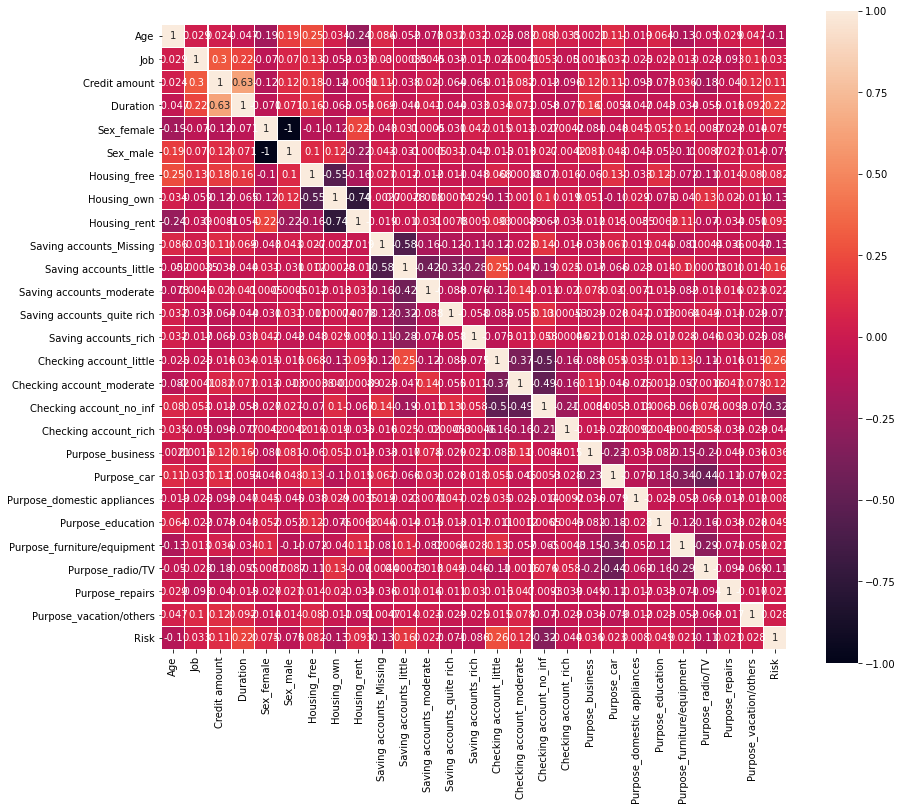

In [51]:
# Correlation analysis of on the data_train rather than df_credit_T
# Because we want see the correlation with Risk 
plt.figure(figsize=(14,12))
sns.heatmap(data_train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

Above correlation heatmap shows **the correlations among the variables**. 
Apart from the correlations between variables, Our attention should focuse on the correlation between the predictor variables and also shows the corelations between predictors and the target variable **Risk**.

**Findings:**
1. The most positive correlation with  **Risk** are: **Checking account_little, Duration, saving account little, house_rent and Credit_amount**. 
2. **Checking account_no_info** has a negitive on the **Risk**.
3. Correlation analysis provides basic information on the connections between predictors and the target variable.

### The importance of the independent (predictors) variable with target variable in order

In [52]:
# show the most influenced variables
var_importance = data_train.corrwith(data_train["Risk"]).abs()
var_importance.sort_values(ascending=False)

Risk                           1.000000
Checking account_no_inf        0.322436
Checking account_little        0.258333
Duration                       0.215280
Saving accounts_little         0.161007
Housing_own                    0.134589
Saving accounts_Missing        0.129238
Checking account_moderate      0.119581
Credit amount                  0.109588
Purpose_radio/TV               0.106922
Age                            0.102463
Housing_rent                   0.092785
Saving accounts_rich           0.085749
Housing_free                   0.081556
Sex_male                       0.075493
Sex_female                     0.075493
Saving accounts_quite rich     0.070954
Purpose_education              0.049085
Checking account_rich          0.044009
Purpose_business               0.036129
Job                            0.032735
Purpose_vacation/others        0.028058
Purpose_car                    0.022621
Saving accounts_moderate       0.022255
Purpose_furniture/equipment    0.020971


**Findings:**

With this order we can decide how many and which parameters to use.

### PCA Analysis 

With PCA, we can also find **the number of features required** to explain the variance in all candidate features. We have 25 features that all can potentially be predictors. Let us see their prediction power over target variable.

In [53]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
n=25
columns=['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 
         'PCA_8', 'PCA_9', 'PCA_10', 'PCA_11', 'PCA_12','PCA_13','PCA_14',
         'PCA_15', 'PCA_16', 'PCA_17', 'PCA_18', 'PCA_19', 'PCA_20', 'PCA_21', 
         'PCA_22', 'PCA_23', 'PCA_24', 'PCA_25'
        ]

PCA is affected by scale. So we need to scale the features in our data before applying PCA. The scale is done by using  **StandardScaler**. It can standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

In [54]:
# Standardizing the features
# df_credit_T is the origianl dataset applied 
X = StandardScaler().fit_transform(df_credit_T)


#### Using PCA **.fit_transform()** to find PCs

In [55]:
# Create the PCA instance and fit and transform the data with pca
pca = PCA(n_components=n)
pc = pca.fit_transform(X)
df_pc = pd.DataFrame(pc, columns=columns)
df_pc.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_16,PCA_17,PCA_18,PCA_19,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25
0,-1.018167,-1.730757,-0.534504,-1.605200,-0.558564,-0.002656,0.786278,-0.456806,2.561647,-0.422994,...,-0.308469,0.760651,-1.519963,-1.671604,0.899301,0.599212,1.061378e-16,-1.238070e-16,8.751386e-17,3.551028e-16
1,1.218019,0.317289,0.150809,3.162555,0.786432,-0.791082,1.553393,-1.194394,-0.126396,0.182477,...,-0.910949,-0.861151,0.404626,0.735539,-0.083732,-0.001429,-2.007572e-15,4.290639e-16,9.724815e-16,-3.289864e-16
2,-0.614641,-1.406914,-0.779647,-1.403153,-0.228294,-0.466442,1.153313,2.282418,-0.795828,-1.775717,...,-0.633145,-0.080049,1.519954,1.133972,1.311420,0.406648,-1.238364e-15,-1.138569e-16,1.622572e-15,4.163455e-16
3,-0.795999,3.589014,-1.753557,-0.811841,0.929037,0.759026,0.676343,1.490301,0.610071,0.925534,...,-0.419910,-0.657842,-1.597549,1.036769,-0.169554,0.016452,2.359570e-15,1.889176e-16,6.455312e-16,5.983497e-16
4,-1.294473,3.193458,-1.428547,-2.214604,-0.535916,-0.761856,0.536341,-0.214073,-0.412558,0.453541,...,-0.495145,-0.285878,-1.057225,0.401163,-0.254939,0.229546,4.346325e-15,5.726678e-15,5.783142e-16,-1.970606e-15


The DataFrame **df_pc** shows the **explained variance**, which is the information (variance) attributed by each of the principal components. This important that we know how much information contribution can be accumulated by a number of the pricinpal components together. PCA.explained_variance_ratio_ tell us the percentage (importance) of each PC. Notice that **this analysis does not link predictors witht the target variable**. 

In [56]:
pca.explained_variance_ratio_

array([9.78762160e-02, 8.82229969e-02, 7.63794993e-02, 6.70586912e-02,
       5.77624346e-02, 5.29842676e-02, 5.22361031e-02, 4.70149228e-02,
       4.57354519e-02, 4.25904957e-02, 4.23675744e-02, 4.17673187e-02,
       3.92543440e-02, 3.89028436e-02, 3.77686817e-02, 3.69824343e-02,
       3.51320366e-02, 3.30174427e-02, 2.89614831e-02, 2.51847786e-02,
       1.27999831e-02, 1.93026801e-32, 5.00679653e-33, 3.46076197e-33,
       1.95811082e-33])

**Finding:**

**explained_variance_ratio_**, tells us that the first principal component contains 9.98% of the variance and the second principal component contains 9.26% of the variance. Together, the two components contain nearly 20% of the information.

#### Plot the (variance) of PCA information contribution in a Bar chat

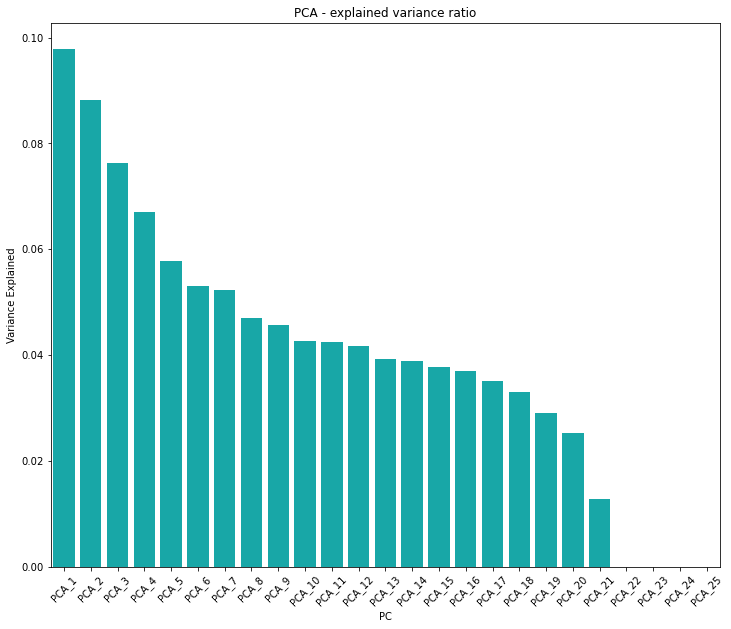

In [87]:
# Create a DataFrame for visulisation
pca_df = pd.DataFrame({'Variance Explained':pca.explained_variance_ratio_,
             'PC':df_pc.columns})

plt.figure(figsize=(12, 10))
plt.title('PCA - explained variance ratio')
# Plot DataFrame
sns.barplot(x='PC',y='Variance Explained', 
           data=pca_df, color="c")
plt.xticks(rotation=45)
plt.show()

#### Plot the cumulated (variance) information contribution

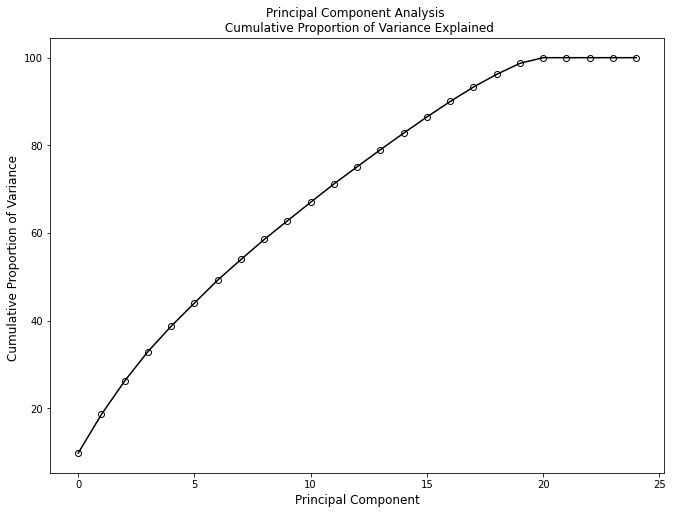

In [83]:
plt.figure(figsize=(11, 8))
# Instantiate, fit and transform

var = pca.explained_variance_ratio_

# Plot cumulative variance
cumulative_var = np.cumsum(var)*100
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis \n Cumulative Proportion of Variance Explained',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance ",fontsize=12)
plt.show()

**Finding:**
 
From the plots above, we see that approximately **17 features** are needed to explain 90% of the variance in the dataset.
This gives us a good intuition of the number of features required in our model.

**For the minimum numbers of predictor to achieve the best performance, the number of predictors are 20. With correlation analysis, we can choice the 20 predictors.**

### Assess models' performance after features selection

In [59]:
# Data preparation
X = df_credit_T.drop(['Purpose_car', 'Saving accounts_moderate', 'Purpose_furniture/equipment', 'Purpose_repairs', 'Purpose_domestic appliances'], axis=1)
y = df_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Model LR has accuracy of: 0.736 
Model KNN has accuracy of: 0.724 
Model DT has accuracy of: 0.672 
Model NB has accuracy of: 0.676 
Model RF has accuracy of: 0.744 
Model SVM has accuracy of: 0.740 


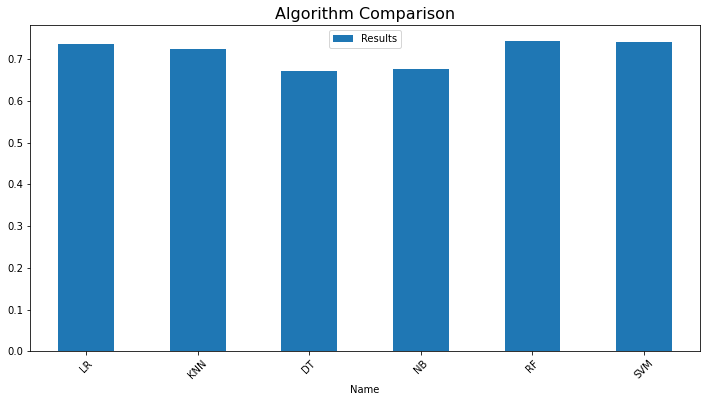

In [95]:
# to feed the random state
seed = 42

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
#models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
names = []

for name, model in models:
        model.fit(X_train, y_train)
        pre_results = model.predict(X_test)
        model_acc = accuracy_score(y_test, pre_results)
        names.append(name)
        results.append(model_acc)
        msg = "Model %s has accuracy of: %0.3f " % (name, model_acc)
        print(msg)      



# boxplot algorithm comparison
results_df = pd.DataFrame({'Name':names, 'Results':results})

#print(results_df)
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Algorithm Comparison', fontsize=16)
results_df.plot.bar(x='Name', rot=45, ax=ax)

plt.show()

**Findings:**

We can see after select predictors the noise has been reduced, so all models' performance has been improved.

<a id="CV"></a> 
## 6.2 Models' perforance Cross-Validation

**Cross-validation** (CV) is a technique used in machine learning and prediction model construction to evaluate the performance of a model on new, unseen data. It involves splitting the data into a training set and a validation set. The training set is used to train the model, while the validation set is used to evaluate the performance of the trained model. This process is repeated multiple times, with different subsets of the data used for training and validation each time.

There are several different types of cross-validation techniques, including k-fold cross-validation, leave-one-out cross-validation, and stratified cross-validation. Each of these techniques has its own advantages and disadvantages, and the choice of which technique to use depends on the specific requirements of the problem at hand.

Cross-validation can be used to tune the hyperparameters of the model and provides accurate and reliable estimates of a model's performance. [scikit-learn](https://scikit-learn.org/stable/modules/cross_validation.html) has provided a good introduction on CV. 

**K-fold cross-validation** is a commonly used method of cross-validation in machine learning. In k-fold cross-validation, the available data is divided into k equal-sized subsets, or "folds". The model is then trained on k-1 of these folds, and the remaining fold is used as the validation set to evaluate the performance of the model.

This process is repeated k times, with a different fold used for validation each time. The results of each validation can then be averaged to provide an overall estimate of the model's performance. 

![](grid_search_cross_validation.png)

One advantage of k-fold cross-validation is that it allows for a more accurate estimate of the model's performance than a simple train-test split, as it uses all available data for training and validation. K-fold cross-validation can also be used to tune the hyperparameters of the model, by evaluating the performance of the model for different values of the hyperparameters.

The choice of k in k-fold cross-validation depends on the size of the available data and the computational resources available. Typically, values of k between 5 and 10 are used, as these provide a good balance between bias and variance.

Overall, k-fold cross-validation is a powerful tool in machine learning model construction, as it allows for an accurate estimate of the model's performance and can be used to optimize the hyperparameters of the model for improved performance.

The following is a simple example of using k-fold cross-validation to measure models' performance. Here, we only use accuracy as the measure. CV can use many other measures such as F1-score. 

In [61]:
# Data preparation
X = df_credit_T.drop(['Purpose_car', 'Saving accounts_moderate', 'Purpose_furniture/equipment', 'Purpose_repairs', 'Purpose_domestic appliances'], axis=1)
y = df_y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

LR accurcy= 0.740  and sd = 0.053)
KNN accurcy= 0.699  and sd = 0.038)
DT accurcy= 0.669  and sd = 0.038)
NB accurcy= 0.698  and sd = 0.066)
RF accurcy= 0.726  and sd = 0.048)
SVM accurcy= 0.717  and sd = 0.045)


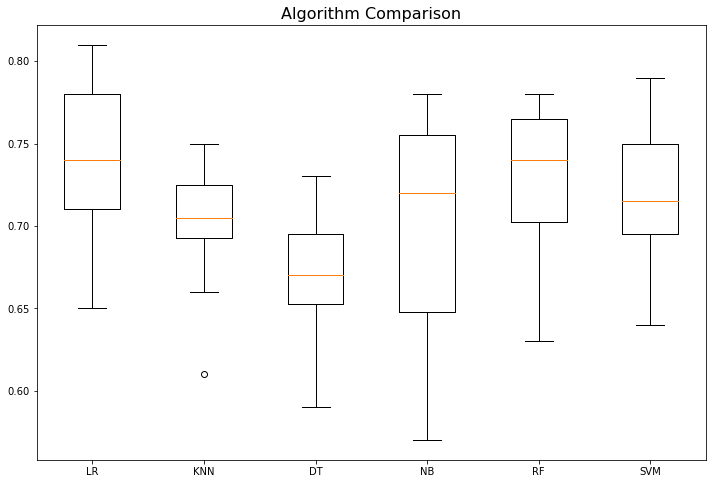

In [104]:
# to feed the random state
seed = 42

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
#models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
validates = []
names = []
scoring = 'accuracy'

for name, model in models:
        
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
        cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s accurcy= %0.3f  and sd = %0.3f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

        
# boxplot algorithm comparison
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Algorithm Comparison', fontsize=16)
#fig.suptitle('Algorithm Comparison')
#ax = fig.add_subplot(111)
plt.boxplot(results)

ax.set_xticklabels(names)
plt.show()

**Finding:**

- All models' performance has been accurately measured.
- The best performance is achieved when split data set with K=10 fold.
- A good explanation on K-fold CV is in https://scikit-learn.org/stable/modules/cross_validation.html



<a id="Overfitting"></a>
## 6.3 Overfitting detection with K-fold CV 

**Overfitting** is common problem in model construction. It occurs when a model is trained to fit the training data too well, which can lead to poor performance on new, unseen data.

Overfitting can be detected using k-fold cross-validation, we can compare the performance of the model on the training set and the validation set. If the model performs significantly better on the training set than on the validation set, it is likely overfitting the training data. In this case, you may need to adjust the hyperparameters of the model, such as regularization strength or number of features, to prevent overfitting.

The following code demonstrates the use of CV for overfitting detection. We can export the taining and the testing accuracy. The training accuracy is the mean accuracy on the X_train and y_train, and the test accuracy is the accuracy on X_test and y_test. If training sccuracy is significantly higher than testing accuracy, we know the model is overfitted with the training dataset.  

In [114]:
from sklearn.model_selection import cross_validate

# to feed the random state
seed = 42

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
#models.append(('XGB', XGBClassifier()))

# evaluate each model in turn
results = []
validates = []
names = []
scoring = 'accuracy'

for name, model in models:
        
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
        #cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        CV_results = cross_validate(model, X, y, cv=kfold, scoring=scoring, return_train_score=True)
        #print(CV_results.keys())
        model_acc = CV_results['train_score']
        model_val = CV_results['test_score']
        validates.append(model_val) 
        names.append(name)
        results.append(model_acc)
        #print(CV_results.keys())
        #print(model_acc)
        msg = "Model %s has: %0.3f train accuracy, %0.3f test accuracy" % (name, model_acc.mean(), model_val.mean())
        #msg = "Modle %s has: %0.3f test accuracy" % (name,  model_val.mean())
        print(msg)  


Model LR has: 0.752 train accuracy, 0.740 test accuracy
Model KNN has: 0.802 train accuracy, 0.699 test accuracy
Model DT has: 1.000 train accuracy, 0.660 test accuracy
Model NB has: 0.711 train accuracy, 0.698 test accuracy
Model RF has: 1.000 train accuracy, 0.740 test accuracy
Model SVM has: 0.748 train accuracy, 0.717 test accuracy


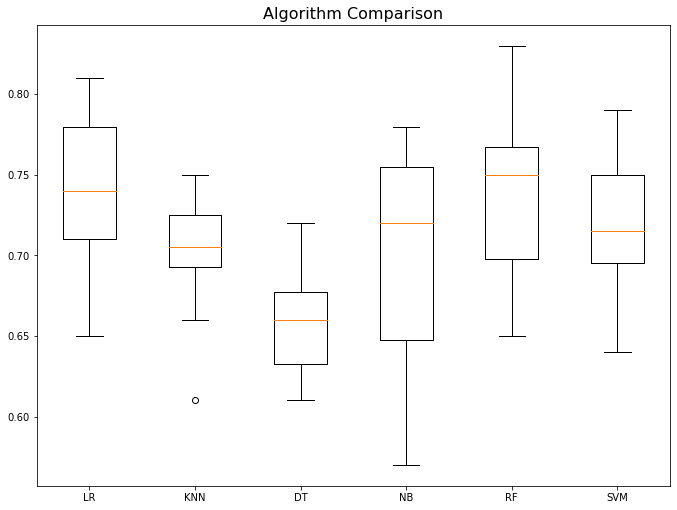

In [118]:
# plot the graph

fig, ax = plt.subplots(figsize=(11, 8))
ax.set_title('Algorithm Comparison', fontsize=16)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
plt.boxplot(validates)
ax.set_xticklabels(names)
plt.show()

**Finding:**

We can see that all models have a higher accuracy on the training and a lower accuracy on test. It shows all our models have certain degree of **"overfitting".**

<a id="RFCV"></a> <br>
## 6.4 Fine tune RF Hyperparameters with K-fold CV 

All models we used with their default parameters. It is a common practice that fine tune hyperparameters for models used in the final prediction. In this tutorial we use **Random Forest (RF)** model as an example to demonstrate the process and technologies used in k-fold CV for model fine tune. 


With scikit-learn, tuning a classifier for recall can be achieved in (at least) two main steps.

1. Using GridSearchCV to tune your model by searching for the best hyperparameters and keeping the classifier with the highest recall score.
2. Adjust the decision threshold using the precision-recall curve and the roc curve, which is a more involved method that I will walk through.

Random Forest Hyperparameters we’ll be Looking at:
- **max_depth:** 
The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node
- **min_sample_split:** default is 2. This means that if any terminal node has more than two observations and is not a pure node, we can split it further into subnodes.
- **max_leaf_nodes:** sets a condition on the splitting of the nodes in the tree and hence restricts the growth of the tree. If
- **min_samples_leaf:** specifies the minimum number of samples that should be present in the leaf node after splitting a node.
- **n_estimators:** how many trees should we consider
- **max_sample (bootstrap sample):** determines what fraction of the original dataset is given to any individual tree. 
- **max_features:** the number of maximum features provided to each tree in a random forest.
- **criterion:** the measures of splitting of a node of a decision tree (Gini, entropy and error rate).

Among these Hyperparameters, three categories are covered: Tree size (terminate conditions), sample and features. So the grid is also normally specifying these three.

### Basic Techniques:

- RandomizedSearchCV
- GridSearchCV

In [67]:
#Seting the Hyper Parameters
param_grid = {"max_depth": [3, 5, 7, 10, None],
              "n_estimators":[10,15,50,100],
              "max_features": [10,15, 20]}

#Creating the classifier
model = RandomForestClassifier(random_state = 2)

grid_search = GridSearchCV(model, param_grid = param_grid, cv=5, scoring='recall', verbose=0)
# we use recall rather than accurate because in our application we care more of correct prediciton rate on positive results.
# verbose shows the msg to display:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2),
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'max_features': [10, 15, 20],
                         'n_estimators': [10, 15, 50, 100]},
             scoring='recall')

In [68]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.503864734299517
{'max_depth': None, 'max_features': 20, 'n_estimators': 15}


In [69]:
rf = RandomForestClassifier(max_depth=None, max_features=20, n_estimators=15, random_state=2)
#rf = RandomForestClassifier(max_depth=None, max_features=15, n_estimators=15, random_state=42)
#rf = RandomForestClassifier(max_depth=None, max_features=15, n_estimators=25, random_state=42)
#rf = RandomForestClassifier(max_depth=None, max_features=15, n_estimators=500, random_state=42)
#rf = RandomForestClassifier(max_depth=3, max_features=15, n_estimators=100, random_state=42)
#rf = RandomForestClassifier(random_state=42)
#trainning with the best params
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=20, n_estimators=15, random_state=2)

In [70]:
#Testing the model 
#Predicting using our  model
y_pred = rf.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))

0.76


[[159  19]
 [ 41  31]]


**Finding:**
with Grid search we can find the best hyperparameters.
Use them we can improve the model's performance.

from  **71.6** to **76%**

# End